# Project Week 2

Emiel Steegh   - s1846388  
Freek Nijweide - s1857746

# Project Description

Description etc etc

## Import and Settings

In [ ]:
# The following includes are needed to work with graphs and display solutions.
from __future__ import division
import networkx as nx
from IPython.core.display import display
%matplotlib inline

import numpy as np
import pprint

import matplotlib.pyplot as plt
from utils import *
from graphs import *

import pandas as pd

pp = pprint.PrettyPrinter()
plt.rcParams["figure.figsize"] = [12,8]

print("imports done")

## General Code Definitions

In [ ]:
#General code definitions
def pagerank(graph,beta): #Made for assignment 4, but needed in assignment 3
    #type: (nx.DiGraph, float) -> any
    M,nodes = generate_M_and_v(graph)
    for i in range(len(nodes)):
        node=nodes[i]
        if graph.out_degree(node) > 0:
            M[i] /= graph.out_degree(node)
    M=M.T # We were working with adjacency matrix. The transition matrix is a transpose of this, where each
    #       number is divided by the out-degree of the node the edge is coming from
    original_v=np.ones(len(M),dtype=float)/len(M)
    v = np.copy(original_v)
    change_was_made = True
    while change_was_made:
        previous_v = np.copy(v)
        first_term = beta* (np.array(np.dot(M,v)).flatten())
        second_term = np.dot((1-beta),original_v)
        v = first_term + second_term
        change_was_made = ((abs(v-previous_v).max() ) > 0.00000000000001) #This 0.00... number was experimentally chosen. Smaller values seemed not to converge, for some graphs 
    
    return v

def wrap_pagerank_in_dict(graph,beta=0.85): #Made for assignment 4, but needed in assignment 3
    values = pagerank(graph,beta)
    keys = list(graph.nodes())
    return dict(zip(keys,values))

## Graph Definitions

Generated web graph
Big web graph (for testing)
Arrow graph
Inward graph
Lasso graph
Grid graph


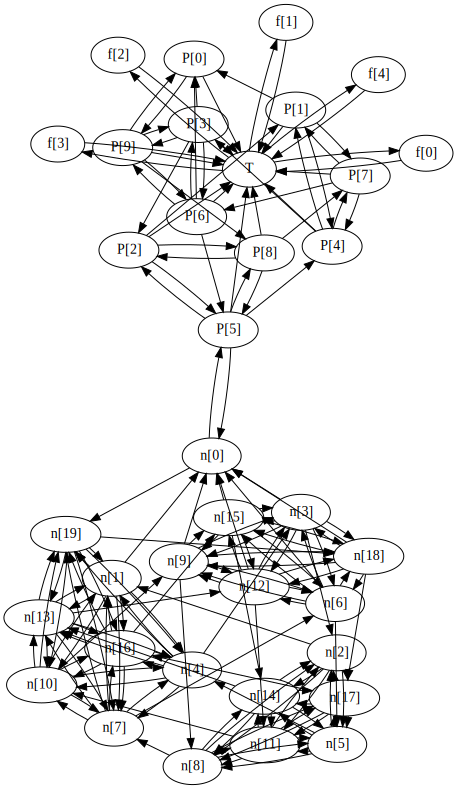

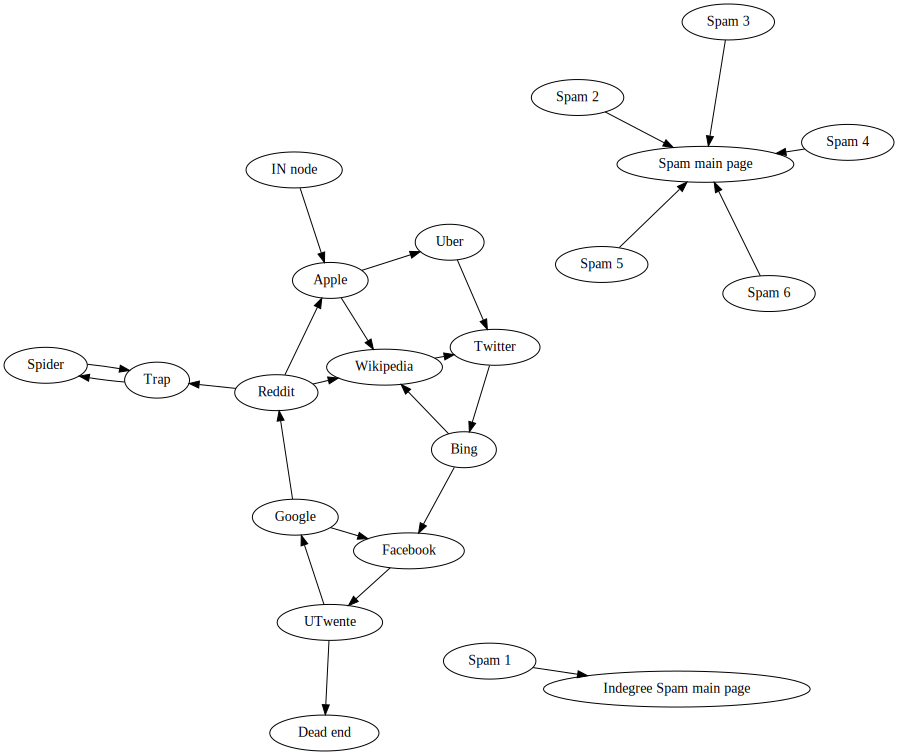

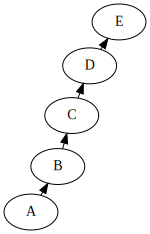

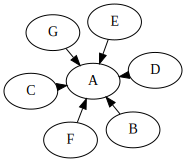

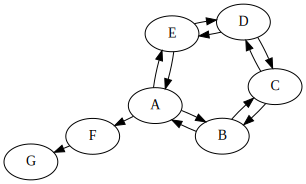

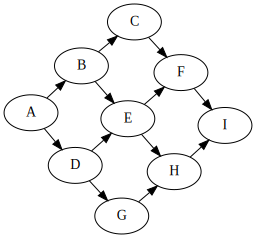

In [29]:
def generate_network(n_count, P_count, f_count):
    '''
    Generates a network around T (Target) with
    f supporting pages (link back and forth to T)
    n inaccesible pages for T
    P accessible pages with a link to T
    '''
    
    G = nx.DiGraph()
    nodes_dict = {}
    
    G.add_node('T')
    nodes_dict['Target'] = ['T']
    
    nodes_dict['f'] = []
    for f in range(f_count):
        new_node = "f[{}]".format(f)
        G.add_edge('T', new_node)
        G.add_edge(new_node, 'T')
        nodes_dict['f'].append(new_node)
    
    nodes_dict['P'] = []
    G.add_edge("P[0]", "P[{}]".format(P_count-1))
    G.add_edge("P[0]", "T")
    for P1 in range(1, P_count):
        P1_name = "P[{}]".format(P1)
        P1_prev = "P[{}]".format(P1-1)
        for P2 in range (P_count):
            P2_name = "P[{}]".format(P2)
            if P1 != P2 and P1 % 3 == P2 % 3:
                G.add_edge(P1_name,P2_name)
        G.add_edge(P1_name, P1_prev)
        G.add_edge(P1_name, "T")
        nodes_dict['P'].append(P1_name)
    
    G.add_edge("n[0]", "n[{}]".format(n_count-1))
    G.add_edge("n[0]","P[{}]".format(P_count//2))
    G.add_edge("P[{}]".format(P_count//2),"n[0]")
    
    
    nodes_dict['n'] = ["n[0]"]
    for n in  range(1,n_count):
        new_node = "n[{}]".format(n)
        prev_node = "n[{}]".format(n-1)
        G.add_edge(new_node, prev_node)
        for n2 in range(0, n_count):
            if n != n2 and n2 % 3 == n % 3  :
                add_connections = "n[{}]".format(n2)
                G.add_edge(new_node,add_connections)
        nodes_dict['n'].append(new_node)
        
    G.name = "Generated web graph"

    #display(draw(G))
    return G, nodes_dict

# Generate a graph we will use in the next exercise
def generate_test_web():
    graph = nx.DiGraph()

    graph.add_edge('Google', 'Facebook')
    graph.add_edge('Facebook', 'UTwente')
    graph.add_edge('UTwente', 'Google')
    graph.add_edge('Google', 'Reddit')
    graph.add_edge('Reddit', 'Trap')
    graph.add_edge('Spider','Trap')
    graph.add_edge('Trap','Spider')
    graph.add_edge('Reddit', 'Apple')
    graph.add_edge('Reddit', 'Wikipedia')
    graph.add_edge('Apple', 'Uber')
    graph.add_edge('Uber', 'Twitter')
    graph.add_edge('Twitter', 'Bing')
    graph.add_edge('Wikipedia', 'Twitter')
    graph.add_edge('Bing', 'Wikipedia')
    graph.add_edge('Apple', 'Wikipedia')
    graph.add_edge('Bing','Facebook')
    graph.add_edge('UTwente','Dead end')
    graph.add_edge('IN node','Apple')
    graph.add_edge('Spam 1', 'Indegree Spam main page')
    graph.add_edge('Spam 2', 'Spam main page')
    graph.add_edge('Spam 3', 'Spam main page')
    graph.add_edge('Spam 4', 'Spam main page')
    graph.add_edge('Spam 5', 'Spam main page')
    graph.add_edge('Spam 6', 'Spam main page')
    graph.name = "Big web graph (for testing)"

    return graph

def gen_arrow():
    G = fromDot('''
    strict digraph A {
    A -> B -> C -> D -> E;
    }''')
    G.name = "Arrow graph"
    return nx.DiGraph(G)
    
def gen_inward():
    G = fromDot('''
    strict digraph A {
    {B C D E F G } -> A;
    }''')
    G.name = "Inward graph"
    return nx.DiGraph(G)

def gen_lasso():
    G = fromDot('''
    strict digraph A {
    A -> B -> C -> D -> E -> A;
    A -> E -> D -> C -> B -> A;
    A -> F -> G;
    }''')
    G.name = "Lasso graph"
    return nx.DiGraph(G)

def gen_grid():
    G = fromDot('''
    strict digraph A {
    A -> {B D};
    B -> {C E};
    
    C -> {F};
    D -> {E G};
    E -> {F H};
    F -> {I};
    G -> {H};
    H -> {I};
    I -> {};
    }''')
    G.name = "Grid graph"
    return nx.DiGraph(G)


graphs = [
generate_network(20,10,5)[0],
generate_test_web(),
gen_arrow(),
gen_inward(),
gen_lasso(),
gen_grid()
]

for graph in graphs:
    print graph.name
    display(draw(graph))

## Assignment 1

text

## Assignment 2

text

## Assignment 3

In [ ]:
#TODO
#create a spamfarm graph
#PageRank + Spider-trap avoidane and beta .85


def calc_pagerank_contrib(group, pageranks, beta):
    r = 0
    pp.pprint(group)
    for node in group:
        r += beta * pageranks[node]
    
    #print(r)
    return r

def change_supports(n_count, P_count, f_minmax):
    x = [] # supports of T
    y = [] # pagerank of T
    f_min = min(f_minmax)
    f_max = max(f_minmax)
    for supports in range(f_min, f_max+1):
        G, nodes_dict = generate_network(n_count,P_count,supports)
        pr = nx.pagerank(G)
        x.append(supports)
        y.append(pr["T"])
        
    fig, ax = plt.subplots()
    
    plt.title ('Amount of supports vs. ')
    
    
    return x, y
        

# G, nodes_dict = generate_network(20,10,5) # default network
# pr = nx.pagerank(G)
# pp.pprint(pr)
# calc_pagerank_contrib(nodes_dict["P"], pr, 0.85)

change_supports(20,10,[0,20])

## Assignment 4

There are three different ranking systems discussed in this week's chapters and lectures.
The first is an inDegree-based ranking system. The ranking of a page depends on how many pages link to it.
This system is easily fooled, and dead-end pages receive incredibly high rankings.

The second ranking system discussed is Google's PageRank. This system expands upon the idea of inDegree rankings,
by having a node "spread" its incoming ranking over its outgoing links. This can also include a degree of randomness,
where a node will spread some of its incoming ranking over *all* nods (to avoid spider traps and dead ends).

The third ranking system discussed HITS, based on the hub-authority model. In this model, a page is considered a good hub
if it links to good authorities (pages with good content that people want to see). A page is considered a good
authority if it is linked to by proper hubs. The page's authority ranking is the one actually used in the search.


# write equations
# implementeer ze
# leg code uit
# leg resultaten uit

In [24]:
#Note: the pagerank functions can be found at the top of the file, as they were needed in assignment 3 already

def generate_M_and_v(graph):
    #type: (nx.DiGraph) -> any
    M = nx.to_numpy_matrix(graph) #type: np.matrix
    M.transpose()
    M_T = M.transpose()
    v = list(graph.nodes)
    return M,v

def generate_indegree_score(graph):    
    in_degrees = []
    for node in graph.nodes:
        if type(graph) == nx.classes.digraph.DiGraph:
            in_degrees.append(graph.in_degree(node))
        else:
            in_degrees.append(graph.degree(node))
    return in_degrees
    
def order_nodes_by_rank(nodes, rank):    
    order = np.argsort(rank)[::-1] #sort in degrees in descending order, return indices
    sorted_nodes = [nodes[i] for i in order] #Human readable sorted list of nodes
    ordinal_rank = [list(order).index(i) for i in range(len(order))] # Ordinal rank as specified in exercise
    return sorted_nodes,ordinal_rank

def ordinal_difference(a, b):
    if type(a) == list:
        a = np.array(a,dtype=float)
    if type(b) == list:
        b = np.array(b,dtype=float)
    return sum(abs(a-b))

def hits(M):
    if type(M) != np.matrix:
        M = nx.adjacency_matrix(M)
    v=np.ones(len(M),dtype=float)
    change_was_made = True
    h=np.copy(v)
    a=np.copy(v)
    while change_was_made:
        #calculate new v for hub and authority
        # M remains unchanged
        previous_a = np.copy(a)
        previous_h = np.copy(h)
        
        a = np.array(np.dot(M.transpose(),h)).flatten()
        a /= a.max()

        h = np.array(np.dot(M,a)).flatten()
        h /= h.max()
        change_was_made = ((abs(a-previous_a).max() ) > 0) or ((abs(h-previous_h).max() ) > 0) 
    
    return a,h

nodes and adjacency matrix
['Uber', 'Reddit', 'Google', 'Apple', 'Spam 5', 'Spam 1', 'Twitter', 'Spam 6', 'Wikipedia', 'UTwente', 'Spam 3', 'Spider', 'IN node', 'Facebook', 'Trap', 'Spam 4', 'Indegree Spam main page', 'Spam main page', 'Spam 2', 'Bing', 'Dead end']
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 

In [30]:
graph = generate_test_web()
graphs = [generate_test_web(), gen_lasso(), gen_arrow(),gen_inward(),gen_grid()]
differences=[]
for graph in graphs:
    print graph.name
    print "\n"
    M,v = generate_M_and_v(graph)
    print "nodes and adjacency matrix"
    print v
    print(M)
    
    print "\n"
    
    in_degrees = generate_indegree_score(graph)
    human_readable, indegree_order = order_nodes_by_rank(v, in_degrees)
    print "Solution to in_degree ranking:"
    print "Human readable ranking (nodes sorted by their rank): " + str(human_readable)
    print "Ordinal ranking: " + str(indegree_order)
    print "\n"
    
    a , h = hits(M)
    human_readable, hits_order = order_nodes_by_rank(v, a)
    print "Our solution to HITS ranking"
    print "Human readable ranking: " + str(human_readable)
    print "Ordinal ranking: " + str(hits_order)
    
    print "\n"
    
    print "HITS ranking (networkx implementation, for reference)"
    (real_h_dict, real_a_dict) = nx.hits(graph,max_iter=100000)
    
    difference = []
    real_a=[]
    for i in range(len(v)):
        node = v[i]
        real_a.append(real_a_dict[node])
        difference.append(abs(real_a_dict[node]-a[i]))
        
    real_human_readable, real_hits_order = order_nodes_by_rank(v, real_a)
    print "Human readable ranking: " + str(real_human_readable)
    print "Ordinal ranking: " + str(real_hits_order)
    print "Ordinal ranking difference between our implementation and networkx: " + str (ordinal_difference(hits_order,real_hits_order))
    
    print "\n"
    
    page_rank_list = pagerank(graph,0.85)
    human_readable, pagerank_order = order_nodes_by_rank(v, page_rank_list)
    print "Our solution to pagerank"
    print "Human readable ranking: " + str(human_readable)
    print "Ordinal ranking: " + str(pagerank_order)
    
    print "\n"
    
    print "pagerank ranking (networkx implementation, for reference)"
    (real_v_dict) = nx.pagerank(graph,max_iter=100000)
    
    difference = []
    real_v=[]
    for i in range(len(v)):
        node = v[i]
        real_v.append(real_v_dict[node])
        difference.append(abs(real_v_dict[node]-real_v[i]))
        
    real_human_readable, real_pagerank_order = order_nodes_by_rank(v, real_v)
    print "Human readable ranking: " + str(real_human_readable)
    print "Ordinal ranking: " + str(real_pagerank_order)
    print "Ordinal ranking difference between our implementation and networkx: " + str (ordinal_difference(pagerank_order,real_pagerank_order))
    
    differences.append([ordinal_difference(indegree_order,hits_order),
                        ordinal_difference(indegree_order,pagerank_order),
                        ordinal_difference(hits_order,pagerank_order),
                        ])
    print("\n\n\n")

print(differences)
    # TODO do this for the different graphs in c, and print difference as mentioned in B

Big web graph (for testing)


nodes and adjacency matrix
['Uber', 'Reddit', 'Google', 'Apple', 'Spam 5', 'Spam 1', 'Twitter', 'Spam 6', 'Wikipedia', 'UTwente', 'Spam 3', 'Spider', 'IN node', 'Facebook', 'Trap', 'Spam 4', 'Indegree Spam main page', 'Spam main page', 'Spam 2', 'Bing', 'Dead end']
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 